## Anomaly Detection with Local Outlier Factor (LOF)

이 예제에서는 Local Outlier Factor(LOF) estimator에 대해서 다룬다.<br>
LOF 알고리즘은 비지도 학습 기반 아웃라이어 탐지 방법으로 특정 데이터 포인터와 이웃들과의 지역 밀도 편차를 계산한다. <br>
이 이웃들과의 밀도가 낮으면 이 데이터 포인트를 아웃라이어로 판단한다. <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

### 사용할 데이터를 불러온다

In [2]:
import pickle
with open('./data/Multi_Modal.pickle', 'rb') as f:
    data = pickle.load(f)    

In [3]:
print(data.keys())

TR_Input = data['TR_Input']
VL_Input = data['VL_Input']
TE_Input = data['TE_Input']
VL_Output = data['VL_Output']
TE_Output = data['TE_Output']

dict_keys(['TR_Input', 'VL_Input', 'TE_Input', 'VL_Output', 'TE_Output'])


LoF Model 을 학습시킨다.

In [4]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=50,novelty=True)
clf.fit(TR_Input)
X_scores = clf.decision_function(VL_Input) 

예측 결과의 형태를 확인해보자.
정상인 경우 1 값을 아웃라이어인 경우 -1 값을 리턴한다.

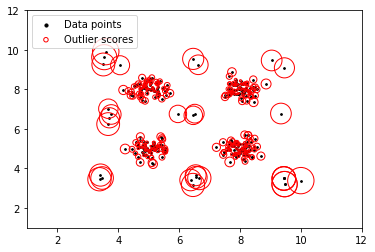

In [5]:
plt.scatter(VL_Input[:, 0], VL_Input[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(VL_Input[:, 0], VL_Input[:, 1], s=700 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((1, 12))
plt.ylim((1, 12))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### 마찬가지로 threshold를 설정한다

In [6]:
# Validation set을 통해 가장 좋은 epsilon(임계치) 탐색
def selectThresholdByLoF(NL,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(NL) - min(NL)) / 1000;
    epsilons = np.arange(min(NL)+0.001,max(NL),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (NL < epsilon) 
        f = f1_score(gt, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon    
    return best_f1, best_epsilon

In [7]:
fscore, threshold = selectThresholdByLoF(X_scores,VL_Output)
print(fscore, threshold)

1.0 -1.8193491268547648


### Test 데이터에 적용해 보자

In [8]:
TR_Input=np.concatenate((VL_Input,TR_Input),axis=0)
clf = LocalOutlierFactor(n_neighbors=50,novelty=True)
clf.fit(TR_Input)
X_scores = clf.decision_function(TE_Input) 

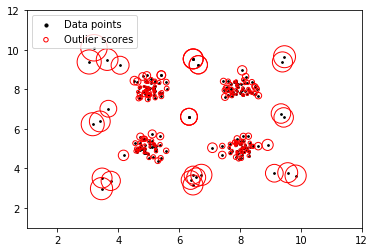

In [9]:
plt.scatter(TE_Input[:, 0], TE_Input[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(TE_Input[:, 0], TE_Input[:, 1], s=700 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((1, 12))
plt.ylim((1, 12))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [10]:
outliers = np.asarray(np.where(X_scores <= threshold))
print(outliers)

[[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
  218 219 220 221 222 223 224 225 226 227 228 229]]


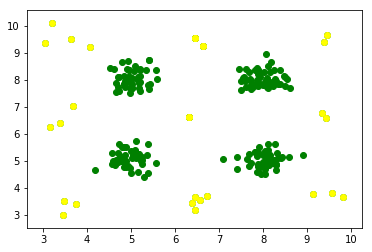

In [11]:
plt.scatter(TE_Input[:, 0], TE_Input[:, 1], c="green")
plt.scatter(TE_Input[np.where(TE_Output==1), 0], TE_Input[np.where(TE_Output==1), 1], c="yellow")
plt.show()

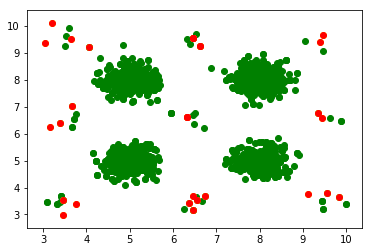

In [12]:
plt.scatter(TR_Input[:, 0], TR_Input[:, 1], c="green")
plt.scatter(TE_Input[np.where(TE_Output==1), 0], TE_Input[np.where(TE_Output==1), 1], c="yellow")
plt.scatter(TE_Input[outliers, 0], TE_Input[outliers, 1], c="red")
plt.show()

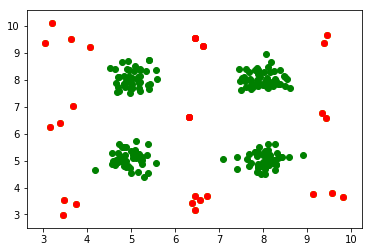

In [13]:
plt.scatter(TE_Input[:, 0], TE_Input[:, 1], c="green")
plt.scatter(TE_Input[np.where(TE_Output==1), 0], TE_Input[np.where(TE_Output==1), 1], c="yellow")
plt.scatter(TE_Input[outliers, 0], TE_Input[outliers, 1], c="red")
plt.show()